In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [92]:
data= pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [94]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
data[data.Outcome == '1'].T

""
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [98]:
missing_counts = data.isnull().sum()
missing_percentages = 100 * data.isnull().mean()
missing = pd.concat([missing_counts, missing_percentages], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [100]:
averages_by_outcome = data.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].mean()
averages_by_outcome.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


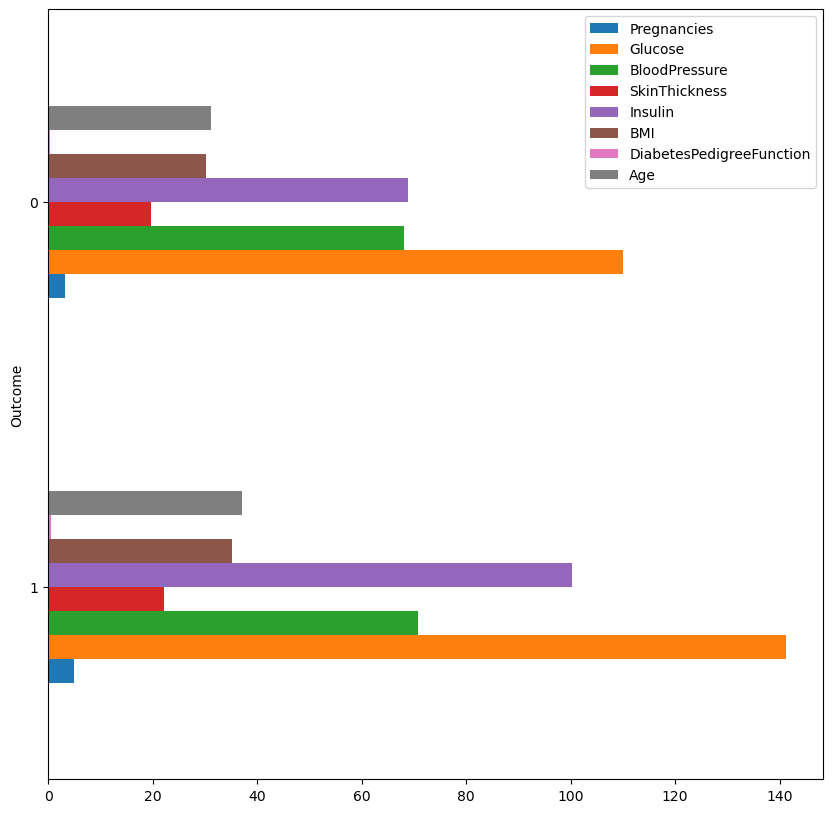

In [102]:
(averages_by_outcome.reindex(index=averages_by_outcome.mean(axis=1).sort_values(ascending=False).index).plot(kind='barh', figsize=(10,10)))
plt.show()

In [104]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


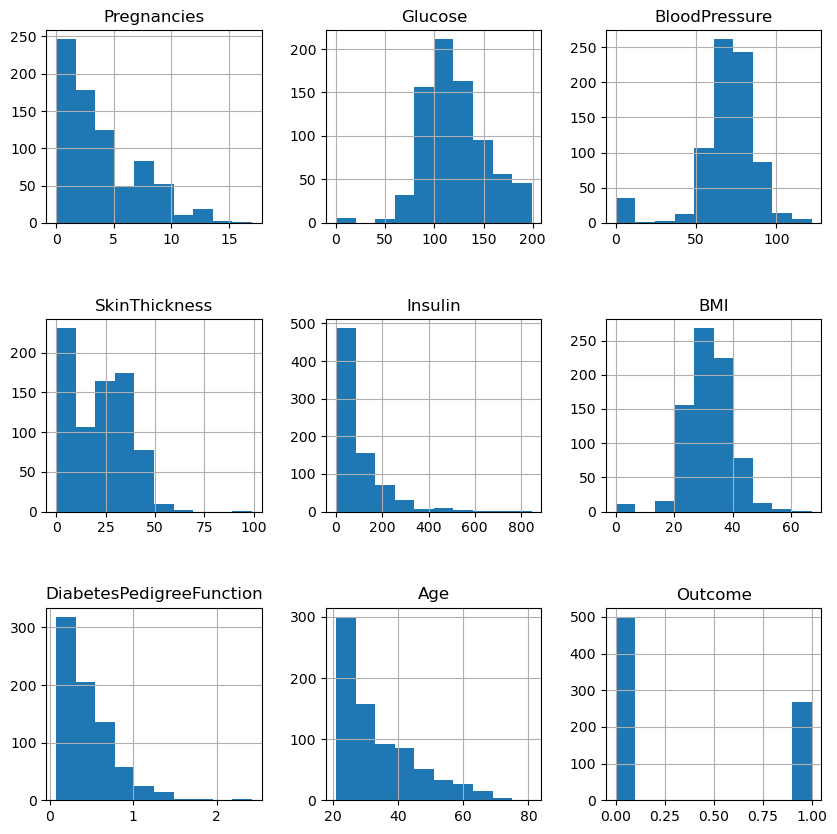

In [106]:
data.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

In [108]:
data[data.Glucose < 40].T

,75,182,342,349,502
Pregnancies,1.00,1.000,1.000,5.000,6.000
Glucose,0.00,0.000,0.000,0.000,0.000
BloodPressure,48.00,74.000,68.000,80.000,68.000
SkinThickness,20.00,20.000,35.000,32.000,41.000
Insulin,0.00,23.000,0.000,0.000,0.000
BMI,24.70,27.700,32.000,41.000,39.000
DiabetesPedigreeFunction,0.14,0.299,0.389,0.346,0.727
Age,22.00,21.000,22.000,37.000,41.000
Outcome,0.00,0.000,0.000,1.000,1.000


In [110]:
data[data.BMI < 10].T

,9,49,60,81,145,371,426,494,522,684,706
Pregnancies,8.000,7.000,2.000,2.000,0.000,0.000,0.000,3.000,6.000,5.00,10.000
Glucose,125.000,105.000,84.000,74.000,102.000,118.000,94.000,80.000,114.000,136.00,115.000
BloodPressure,96.000,0.000,0.000,0.000,75.000,64.000,0.000,0.000,0.000,82.00,0.000
SkinThickness,0.000,0.000,0.000,0.000,23.000,23.000,0.000,0.000,0.000,0.00,0.000
Insulin,0.000,0.000,0.000,0.000,0.000,89.000,0.000,0.000,0.000,0.00,0.000
BMI,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
DiabetesPedigreeFunction,0.232,0.305,0.304,0.102,0.572,1.731,0.256,0.174,0.189,0.64,0.261
Age,54.000,24.000,21.000,22.000,21.000,21.000,25.000,22.000,26.000,69.00,30.000
Outcome,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.000


In [112]:
data[data.BloodPressure < 60].T

,4,6,7,15,18,32,46,49,51,55,...,703,706,707,713,715,729,733,741,742,760
Pregnancies,0.000,3.000,10.000,7.000,1.000,3.000,1.000,7.000,1.000,1.000,...,2.000,10.000,2.000,0.000,7.000,2.000,2.000,3.0,1.000,2.000
Glucose,137.000,78.000,115.000,100.000,103.000,88.000,146.000,105.000,101.000,73.000,...,129.000,115.000,127.000,134.000,187.000,92.000,106.000,102.0,109.000,88.000
BloodPressure,40.000,50.000,0.000,0.000,30.000,58.000,56.000,0.000,50.000,50.000,...,0.000,0.000,46.000,58.000,50.000,52.000,56.000,44.0,58.000,58.000
SkinThickness,35.000,32.000,0.000,0.000,38.000,11.000,0.000,0.000,15.000,10.000,...,0.000,0.000,21.000,20.000,33.000,0.000,27.000,20.0,18.000,26.000
Insulin,168.000,88.000,0.000,0.000,83.000,54.000,0.000,0.000,36.000,0.000,...,0.000,0.000,335.000,291.000,392.000,0.000,165.000,94.0,116.000,16.000
BMI,43.100,31.000,35.300,30.000,43.300,24.800,29.700,0.000,24.200,23.000,...,38.500,0.000,34.400,26.400,33.900,30.100,29.000,30.8,28.500,28.400
DiabetesPedigreeFunction,2.288,0.248,0.134,0.484,0.183,0.267,0.564,0.305,0.526,0.248,...,0.304,0.261,0.176,0.352,0.826,0.141,0.426,0.4,0.219,0.766
Age,33.000,26.000,29.000,32.000,33.000,22.000,29.000,24.000,26.000,21.000,...,41.000,30.000,22.000,21.000,34.000,22.000,22.000,26.0,22.000,22.000
Outcome,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.0,0.000,0.000


In [114]:
data[data.Insulin < 10].T

,0,1,2,5,7,9,10,11,12,15,...,754,756,757,758,759,761,762,764,766,767
Pregnancies,6.000,1.000,8.000,5.000,10.000,8.000,4.000,10.000,10.000,7.000,...,8.000,7.000,0.000,1.000,6.000,9.000,9.000,2.00,1.000,1.000
Glucose,148.000,85.000,183.000,116.000,115.000,125.000,110.000,168.000,139.000,100.000,...,154.000,137.000,123.000,106.000,190.000,170.000,89.000,122.00,126.000,93.000
BloodPressure,72.000,66.000,64.000,74.000,0.000,96.000,92.000,74.000,80.000,0.000,...,78.000,90.000,72.000,76.000,92.000,74.000,62.000,70.00,60.000,70.000
SkinThickness,35.000,29.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,32.000,41.000,0.000,0.000,0.000,31.000,0.000,27.00,0.000,31.000
Insulin,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000
BMI,33.600,26.600,23.300,25.600,35.300,0.000,37.600,38.000,27.100,30.000,...,32.400,32.000,36.300,37.500,35.500,44.000,22.500,36.80,30.100,30.400
DiabetesPedigreeFunction,0.627,0.351,0.672,0.201,0.134,0.232,0.191,0.537,1.441,0.484,...,0.443,0.391,0.258,0.197,0.278,0.403,0.142,0.34,0.349,0.315
Age,50.000,31.000,32.000,30.000,29.000,54.000,30.000,34.000,57.000,32.000,...,45.000,39.000,52.000,26.000,66.000,43.000,33.000,27.00,47.000,23.000
Outcome,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,...,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.00,1.000,0.000


In [116]:
data_0s = data.copy(deep=True)
data_0s[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_0s[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
print(data_0s.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [118]:
data_0s['Glucose'].fillna(data_0s['Glucose'].mean(), inplace=True)
data_0s['BloodPressure'].fillna(data_0s['BloodPressure'].mean(), inplace=True)
data_0s['SkinThickness'].fillna(data_0s['SkinThickness'].median(), inplace=True)
data_0s['Insulin'].fillna(data_0s['Insulin'].median(), inplace=True)
data_0s['BMI'].fillna(data_0s['BMI'].mean(), inplace=True)

/var/folders/h0/7bcg2q917hg3dxs2fjk4nycr0000gn/T/ipykernel_72279/4003724544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_0s['Glucose'].fillna(data_0s['Glucose'].mean(), inplace=True)
/var/folders/h0/7bcg2q917hg3dxs2fjk4nycr0000gn/T/ipykernel_72279/4003724544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

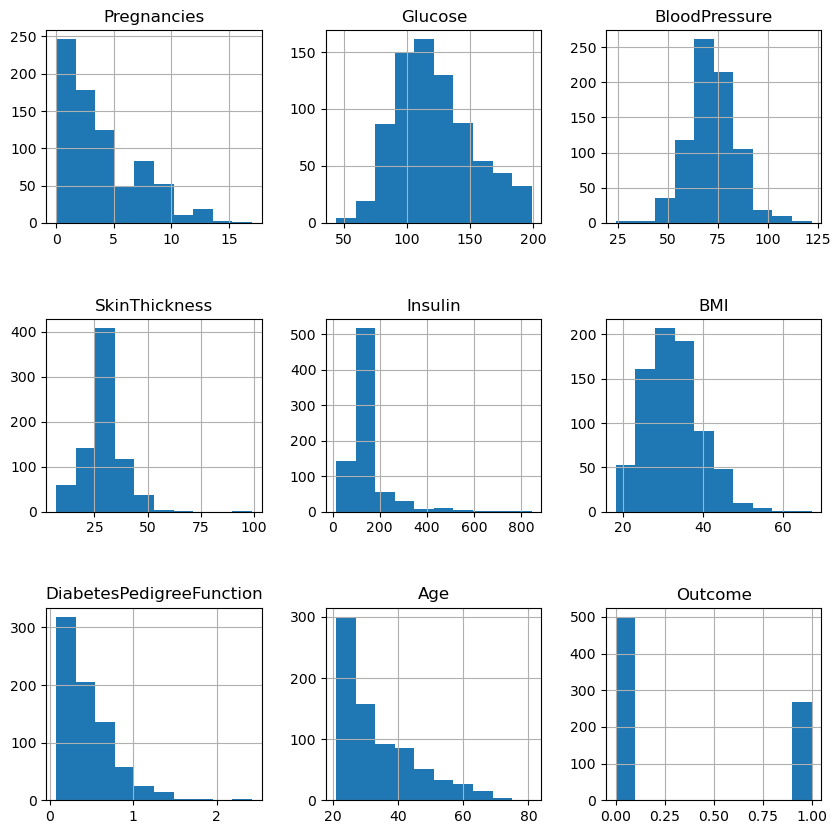

In [130]:
data_0s.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

/var/folders/h0/7bcg2q917hg3dxs2fjk4nycr0000gn/T/ipykernel_72279/1849906309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_0s['Insulin'])


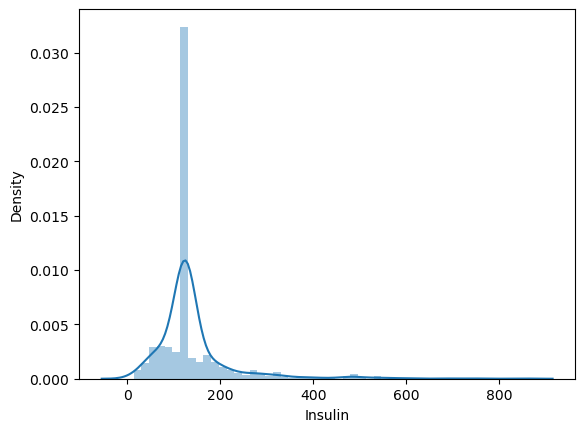

In [140]:
sns.distplot(data_0s['Insulin'])
plt.show()

In [142]:
data_0s[data_0s['Insulin'] > 300]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28,0
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,0
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1
199,4,148.0,60.0,27.0,318.0,30.9,0.150,29,1
220,0,177.0,60.0,29.0,478.0,34.6,1.072,21,1
